In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder,MinMaxScaler

In [ ]:
#loading the datset
train=pd.read_csv('/content/train_genetic_disorder.csv')
test=pd.read_csv('/content/test_genetic_disorder.csv')
data_train=train.copy()
data_test=test.copy()

In [ ]:
train

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22078,PID0x5598,4.0,Yes,Yes,Yes,No,5.258298,Lynn,NaN,Alhassane,...,Multiple,6.584811,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
22079,PID0x19cb,8.0,No,Yes,No,Yes,4.974220,Matthew,Farley,Dartanion,...,Multiple,7.041556,inconclusive,1.0,1.0,1.0,1.0,0.0,Multifactorial genetic inheritance disorders,Diabetes
22080,PID0x3c4f,8.0,Yes,No,Yes,No,5.186470,John,NaN,Cavani,...,Singular,7.715464,normal,0.0,0.0,0.0,1.0,NaN,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
22081,PID0x13a,7.0,Yes,No,Yes,Yes,4.858543,Sharon,NaN,Bomer,...,Multiple,8.437670,abnormal,1.0,1.0,1.0,0.0,0.0,NaN,Leigh syndrome


In [ ]:
test

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,PID0x4175,6,No,Yes,No,No,4.981655,Charles,NaN,Kore,...,-99,2,Multiple,-99.000000,slightly abnormal,True,True,True,True,True
1,PID0x21f5,10,Yes,No,NaN,Yes,5.118890,Catherine,NaN,Homero,...,Yes,-99,Multiple,8.179584,normal,False,False,False,True,False
2,PID0x49b8,5,No,NaN,No,No,4.876204,James,NaN,Danield,...,No,0,Singular,-99.000000,slightly abnormal,False,False,True,True,False
3,PID0x2d97,13,No,Yes,Yes,No,4.687767,Brian,NaN,Orville,...,Yes,-99,Singular,6.884071,normal,True,False,True,False,True
4,PID0x58da,5,No,NaN,NaN,Yes,5.152362,Gary,NaN,Issiah,...,No,-99,Multiple,6.195178,normal,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,PID0x81e1,9,Yes,Yes,NaN,No,4.878335,Francisco,NaN,Artavian,...,Yes,2,Multiple,7.234960,abnormal,False,True,True,True,False
9461,PID0x3514,1,Yes,No,NaN,Yes,4.927151,James,NaN,Nasir,...,No,-99,Singular,4.859536,abnormal,False,True,False,True,True
9462,PID0x5408,2,No,Yes,No,No,4.898352,Rebecca,NaN,Jatorian,...,No,3,-99,5.696062,normal,False,True,False,False,True
9463,PID0x2017,13,No,Yes,No,No,4.804840,Daryl,NaN,Keevis,...,-99,1,Singular,3.000000,inconclusive,True,True,True,True,True


In [ ]:
train.dtypes

Patient Id                                           object
Patient Age                                         float64
Genes in mother's side                               object
Inherited from father                                object
Maternal gene                                        object
Paternal gene                                        object
Blood cell count (mcL)                              float64
Patient First Name                                   object
Family Name                                          object
Father's name                                        object
Mother's age                                        float64
Father's age                                        float64
Institute Name                                       object
Location of Institute                                object
Status                                               object
Respiratory Rate (breaths/min)                       object
Heart Rate (rates/min                   

In [ ]:
#No. of missing values in each row
data_train.isnull().sum()

Patient Id                                             0
Patient Age                                         1427
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Patient First Name                                     0
Family Name                                         9691
Father's name                                          0
Mother's age                                        6036
Father's age                                        5986
Institute Name                                      5106
Location of Institute                                  0
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Test 1                         

In [ ]:
data_test.isnull().sum()

Patient Id                                             0
Patient Age                                            0
Genes in mother's side                                 0
Inherited from father                                551
Maternal gene                                       3723
Paternal gene                                          0
Blood cell count (mcL)                                 0
Patient First Name                                     0
Family Name                                         9317
Father's name                                          0
Mother's age                                           0
Father's age                                           0
Institute Name                                      2036
Location of Institute                                  0
Status                                                 0
Respiratory Rate (breaths/min)                      2886
Heart Rate (rates/min                               2900
Test 1                         

In [ ]:
#subset where no all rows being null
data_fea_train=data_train[data_train.isnull().all(1)!=True]
#subset where no all rows being null
data_fea_train=data_train[data_train.isnull().all(1)!=True]

In [ ]:
#subset where no all rows being null
data_fea_test=data_test[data_test.isnull().all(1)!=True]

In [ ]:
data_test

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,PID0x4175,6,No,Yes,No,No,4.981655,Charles,NaN,Kore,...,-99,2,Multiple,-99.000000,slightly abnormal,True,True,True,True,True
1,PID0x21f5,10,Yes,No,NaN,Yes,5.118890,Catherine,NaN,Homero,...,Yes,-99,Multiple,8.179584,normal,False,False,False,True,False
2,PID0x49b8,5,No,NaN,No,No,4.876204,James,NaN,Danield,...,No,0,Singular,-99.000000,slightly abnormal,False,False,True,True,False
3,PID0x2d97,13,No,Yes,Yes,No,4.687767,Brian,NaN,Orville,...,Yes,-99,Singular,6.884071,normal,True,False,True,False,True
4,PID0x58da,5,No,NaN,NaN,Yes,5.152362,Gary,NaN,Issiah,...,No,-99,Multiple,6.195178,normal,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,PID0x81e1,9,Yes,Yes,NaN,No,4.878335,Francisco,NaN,Artavian,...,Yes,2,Multiple,7.234960,abnormal,False,True,True,True,False
9461,PID0x3514,1,Yes,No,NaN,Yes,4.927151,James,NaN,Nasir,...,No,-99,Singular,4.859536,abnormal,False,True,False,True,True
9462,PID0x5408,2,No,Yes,No,No,4.898352,Rebecca,NaN,Jatorian,...,No,3,-99,5.696062,normal,False,True,False,False,True
9463,PID0x2017,13,No,Yes,No,No,4.804840,Daryl,NaN,Keevis,...,-99,1,Singular,3.000000,inconclusive,True,True,True,True,True


In [ ]:
print(data_fea_train.shape,data_fea_test.shape)

(22083, 45) (9465, 43)


In [ ]:
data_fea_test.isnull().sum()

Patient Id                                             0
Patient Age                                            0
Genes in mother's side                                 0
Inherited from father                                551
Maternal gene                                       3723
Paternal gene                                          0
Blood cell count (mcL)                                 0
Patient First Name                                     0
Family Name                                         9317
Father's name                                          0
Mother's age                                           0
Father's age                                           0
Institute Name                                      2036
Location of Institute                                  0
Status                                                 0
Respiratory Rate (breaths/min)                      2886
Heart Rate (rates/min                               2900
Test 1                         

In [ ]:
# Dropping the features
data_fea_train=data_fea_train.drop(columns=['Patient Id','Patient First Name','Family Name','Father\'s name','Institute Name','Location of Institute','Test 1','Test 2','Test 3','Test 4',
'Test 5','Parental consent'])
data_fea_test=data_fea_test.drop(columns=['Patient Id','Patient First Name','Family Name','Father\'s name','Institute Name','Location of Institute','Test 1','Test 2','Test 3','Test 4',
'Test 5','Parental consent'])

In [ ]:
print(data_fea_train.shape,data_fea_test.shape)

(22083, 33) (9465, 31)


In [ ]:
# renaming the columns
data_fea_train=data_fea_train.rename(columns={"Genes in mother's side":'defective_mother',
                    'Inherited from father':'defective_father',
                    'Maternal gene':'maternal_gene','Paternal gene':'paternal_gene',
                    'Respiratory Rate (breaths/min)':'respiratory_rate','Heart Rate (rates/min':'heart_rate',
                    'Parental consent':'parental_consent','Follow-up':'follow_up','Birth asphyxia':'birth_asphyxia',
                    'Autopsy shows birth defect (if applicable)':'birth_defect_autopsy','Place of birth':'birth_place',
                    'Folic acid details (peri-conceptional)':'folic_acid_periconceptional',
                    'H/O serious maternal illness':'maternal_illness','H/O radiation exposure (x-ray)':'radiation_exposure',
                    'H/O substance abuse':'substance_abuse','Assisted conception IVF/ART':'assisted_conception',
                    'History of anomalies in previous pregnancies':'previous_pregnancy_anomalies',
                    'Birth defects':'birth_defects','Blood test result':'blood_test_result','Genetic Disorder':'genetic_disorder',
                    'Disorder Subclass':'disorder_subclass','Patient Age':'patient_age','Blood cell count (mcL)':'blood_cell_count',
                    "Mother's age":'mother_age',"Father's age":'father_age','No. of previous abortion':'num_previous_abortion',
                    'White Blood cell count (thousand per microliter)':'WBC_count'})

In [ ]:
data_fea_test=data_fea_test.rename(columns={"Genes in mother's side":'defective_mother',
                    'Inherited from father':'defective_father',
                    'Maternal gene':'maternal_gene','Paternal gene':'paternal_gene',
                    'Respiratory Rate (breaths/min)':'respiratory_rate','Heart Rate (rates/min':'heart_rate',
                    'Parental consent':'parental_consent','Follow-up':'follow_up','Birth asphyxia':'birth_asphyxia',
                    'Autopsy shows birth defect (if applicable)':'birth_defect_autopsy','Place of birth':'birth_place',
                    'Folic acid details (peri-conceptional)':'folic_acid_periconceptional',
                    'H/O serious maternal illness':'maternal_illness','H/O radiation exposure (x-ray)':'radiation_exposure',
                    'H/O substance abuse':'substance_abuse','Assisted conception IVF/ART':'assisted_conception',
                    'History of anomalies in previous pregnancies':'previous_pregnancy_anomalies',
                    'Birth defects':'birth_defects','Blood test result':'blood_test_result','Genetic Disorder':'genetic_disorder',
                    'Disorder Subclass':'disorder_subclass','Patient Age':'patient_age','Blood cell count (mcL)':'blood_cell_count',
                    "Mother's age":'mother_age',"Father's age":'father_age','No. of previous abortion':'num_previous_abortion',
                    'White Blood cell count (thousand per microliter)':'WBC_count'})

In [ ]:
data_fea_train['genetic_disorder']

0         Mitochondrial genetic inheritance disorders
1                                                 NaN
2        Multifactorial genetic inheritance disorders
3         Mitochondrial genetic inheritance disorders
4        Multifactorial genetic inheritance disorders
                             ...                     
22078     Mitochondrial genetic inheritance disorders
22079    Multifactorial genetic inheritance disorders
22080     Mitochondrial genetic inheritance disorders
22081                                             NaN
22082    Multifactorial genetic inheritance disorders
Name: genetic_disorder, Length: 22083, dtype: object

In [ ]:
# missing target variables
data_fea_train.iloc[:,-2].isnull().sum(),data_fea_train.iloc[:,-1].isnull().sum()

(2146, 2168)

In [ ]:
# removing rows of missing target variables
data_fea_train=data_fea_train[(data_fea_train['genetic_disorder'].isnull()!=True)&(data_fea_train['disorder_subclass'].isnull()!=True)]

In [ ]:
data_fea_train.shape

(18047, 33)

In [ ]:
data_fea_train

,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,respiratory_rate,...,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,genetic_disorder,disorder_subclass
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Alive,Normal (30-60),...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Deceased,Tachypnea,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Alive,Tachypnea,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
5,14.0,Yes,No,Yes,No,5.103188,NaN,NaN,Deceased,NaN,...,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22077,9.0,No,Yes,Yes,Yes,5.012599,47.0,NaN,Deceased,NaN,...,NaN,12.000000,slightly abnormal,NaN,1.0,0.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
22078,4.0,Yes,Yes,Yes,No,5.258298,35.0,64.0,Deceased,Normal (30-60),...,Multiple,6.584811,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
22079,8.0,No,Yes,No,Yes,4.974220,NaN,56.0,Alive,Normal (30-60),...,Multiple,7.041556,inconclusive,1.0,1.0,1.0,1.0,0.0,Multifactorial genetic inheritance disorders,Diabetes
22080,8.0,Yes,No,Yes,No,5.186470,35.0,51.0,Deceased,Tachypnea,...,Singular,7.715464,normal,0.0,0.0,0.0,1.0,NaN,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy


In [ ]:
#Subsetting
X=data_fea_train.iloc[:,:-2]
y1=data_fea_train.iloc[:,-2]
y2=data_fea_train.iloc[:,-1]

In [ ]:
X

,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,respiratory_rate,...,previous_pregnancy_anomalies,num_previous_abortion,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Alive,Normal (30-60),...,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Deceased,Tachypnea,...,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Alive,Tachypnea,...,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN
5,14.0,Yes,No,Yes,No,5.103188,NaN,NaN,Deceased,NaN,...,No,0.0,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22077,9.0,No,Yes,Yes,Yes,5.012599,47.0,NaN,Deceased,NaN,...,Yes,NaN,NaN,12.000000,slightly abnormal,NaN,1.0,0.0,0.0,0.0
22078,4.0,Yes,Yes,Yes,No,5.258298,35.0,64.0,Deceased,Normal (30-60),...,No,3.0,Multiple,6.584811,inconclusive,0.0,0.0,1.0,0.0,0.0
22079,8.0,No,Yes,No,Yes,4.974220,NaN,56.0,Alive,Normal (30-60),...,No,2.0,Multiple,7.041556,inconclusive,1.0,1.0,1.0,1.0,0.0
22080,8.0,Yes,No,Yes,No,5.186470,35.0,51.0,Deceased,Tachypnea,...,No,2.0,Singular,7.715464,normal,0.0,0.0,0.0,1.0,NaN


In [ ]:
X.dtypes

patient_age                     float64
defective_mother                 object
defective_father                 object
maternal_gene                    object
paternal_gene                    object
blood_cell_count                float64
mother_age                      float64
father_age                      float64
Status                           object
respiratory_rate                 object
heart_rate                       object
follow_up                        object
Gender                           object
birth_asphyxia                   object
birth_defect_autopsy             object
birth_place                      object
folic_acid_periconceptional      object
maternal_illness                 object
radiation_exposure               object
substance_abuse                  object
assisted_conception              object
previous_pregnancy_anomalies     object
num_previous_abortion           float64
birth_defects                    object
WBC_count                       float64


In [ ]:
y1

0         Mitochondrial genetic inheritance disorders
2        Multifactorial genetic inheritance disorders
3         Mitochondrial genetic inheritance disorders
4        Multifactorial genetic inheritance disorders
5                    Single-gene inheritance diseases
                             ...                     
22077     Mitochondrial genetic inheritance disorders
22078     Mitochondrial genetic inheritance disorders
22079    Multifactorial genetic inheritance disorders
22080     Mitochondrial genetic inheritance disorders
22082    Multifactorial genetic inheritance disorders
Name: genetic_disorder, Length: 18047, dtype: object

In [ ]:
y2

0        Leber's hereditary optic neuropathy
2                                   Diabetes
3                             Leigh syndrome
4                                     Cancer
5                            Cystic fibrosis
                        ...                 
22077                         Leigh syndrome
22078                         Leigh syndrome
22079                               Diabetes
22080                 Mitochondrial myopathy
22082                               Diabetes
Name: disorder_subclass, Length: 18047, dtype: object

In [ ]:
# shape of features,target variables
X.shape,y1.shape,y2.shape

((18047, 31), (18047,), (18047,))

In [ ]:
# test data
X_test=data_fea_test

In [ ]:
#converting dissimilar datatype to one
for i in X_test.columns:
    if X_test[i].dtype!=X[i].dtype:
        X_test[i]=X_test[i].astype(X[i].dtype.name)

In [ ]:
X_test.dtypes

patient_age                     float64
defective_mother                 object
defective_father                 object
maternal_gene                    object
paternal_gene                    object
blood_cell_count                float64
mother_age                      float64
father_age                      float64
Status                           object
respiratory_rate                 object
heart_rate                       object
follow_up                        object
Gender                           object
birth_asphyxia                   object
birth_defect_autopsy             object
birth_place                      object
folic_acid_periconceptional      object
maternal_illness                 object
radiation_exposure               object
substance_abuse                  object
assisted_conception              object
previous_pregnancy_anomalies     object
num_previous_abortion           float64
birth_defects                    object
WBC_count                       float64


In [ ]:
X.dtypes

patient_age                     float64
defective_mother                 object
defective_father                 object
maternal_gene                    object
paternal_gene                    object
blood_cell_count                float64
mother_age                      float64
father_age                      float64
Status                           object
respiratory_rate                 object
heart_rate                       object
follow_up                        object
Gender                           object
birth_asphyxia                   object
birth_defect_autopsy             object
birth_place                      object
folic_acid_periconceptional      object
maternal_illness                 object
radiation_exposure               object
substance_abuse                  object
assisted_conception              object
previous_pregnancy_anomalies     object
num_previous_abortion           float64
birth_defects                    object
WBC_count                       float64


In [ ]:
X_test

,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,respiratory_rate,...,previous_pregnancy_anomalies,num_previous_abortion,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,6.0,No,Yes,No,No,4.981655,38.0,61.0,Alive,Tachypnea,...,-99,2.0,Multiple,-99.000000,slightly abnormal,1.0,1.0,1.0,1.0,1.0
1,10.0,Yes,No,NaN,Yes,5.118890,33.0,53.0,Alive,NaN,...,Yes,-99.0,Multiple,8.179584,normal,0.0,0.0,0.0,1.0,0.0
2,5.0,No,NaN,No,No,4.876204,48.0,60.0,Deceased,NaN,...,No,0.0,Singular,-99.000000,slightly abnormal,0.0,0.0,1.0,1.0,0.0
3,13.0,No,Yes,Yes,No,4.687767,25.0,55.0,Alive,-99,...,Yes,-99.0,Singular,6.884071,normal,1.0,0.0,1.0,0.0,1.0
4,5.0,No,NaN,NaN,Yes,5.152362,41.0,38.0,Deceased,Tachypnea,...,No,-99.0,Multiple,6.195178,normal,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,9.0,Yes,Yes,NaN,No,4.878335,28.0,63.0,Alive,-99,...,Yes,2.0,Multiple,7.234960,abnormal,0.0,1.0,1.0,1.0,0.0
9461,1.0,Yes,No,NaN,Yes,4.927151,37.0,62.0,Deceased,-99,...,No,-99.0,Singular,4.859536,abnormal,0.0,1.0,0.0,1.0,1.0
9462,2.0,No,Yes,No,No,4.898352,24.0,32.0,Deceased,Tachypnea,...,No,3.0,-99,5.696062,normal,0.0,1.0,0.0,0.0,1.0
9463,13.0,No,Yes,No,No,4.804840,36.0,56.0,Alive,NaN,...,-99,1.0,Singular,3.000000,inconclusive,1.0,1.0,1.0,1.0,1.0


In [ ]:
# Data Cleaning
X_test=X_test.replace('-99',np.nan)
# Cleaning_data
# replace '-' with other values
X['radiation_exposure']=X['radiation_exposure'].replace('-','others')
X['substance_abuse']=X['substance_abuse'].replace('-','others')
# Cleaning_data
X_test['radiation_exposure']=X_test['radiation_exposure'].replace('-','others')
X_test['substance_abuse']=X_test['substance_abuse'].replace('-','others')


In [ ]:
# Data Cleaning
X_test['WBC_count']=X_test['WBC_count'].mask(X_test['WBC_count']<0,np.nan)
X_test['num_previous_abortion']=X_test['num_previous_abortion'].mask(X_test['num_previous_abortion']<0,np.nan)

In [ ]:
#Splitting the data
X_train1,X_val1,y_train1,y_val1= train_test_split(X,y1,stratify=y1,test_size=0.20)
X_train2,X_val2,y_train2,y_val2= train_test_split(X,y2,stratify=y2,test_size=0.20)

In [ ]:
y_val1

8209      Mitochondrial genetic inheritance disorders
17601                Single-gene inheritance diseases
1326      Mitochondrial genetic inheritance disorders
15067     Mitochondrial genetic inheritance disorders
15394                Single-gene inheritance diseases
                             ...                     
557       Mitochondrial genetic inheritance disorders
8514      Mitochondrial genetic inheritance disorders
5254                 Single-gene inheritance diseases
15842     Mitochondrial genetic inheritance disorders
13368    Multifactorial genetic inheritance disorders
Name: genetic_disorder, Length: 3610, dtype: object

In [ ]:
# shape of train,validation set
print(X_train1.shape,X_val1.shape,y_train1.shape,y_val1.shape)
print(X_train2.shape,X_val2.shape,y_train2.shape,y_val2.shape)

(14437, 31) (3610, 31) (14437,) (3610,)
(14437, 31) (3610, 31) (14437,) (3610,)


In [ ]:
X_train2

,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,respiratory_rate,...,previous_pregnancy_anomalies,num_previous_abortion,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
6750,6.0,No,No,No,No,4.904503,48.0,54.0,Deceased,Tachypnea,...,No,3.0,Multiple,7.258985,normal,1.0,0.0,1.0,0.0,0.0
14674,9.0,Yes,Yes,Yes,Yes,5.102999,34.0,25.0,Alive,Tachypnea,...,Yes,0.0,Multiple,7.412485,slightly abnormal,1.0,1.0,0.0,0.0,0.0
17270,14.0,Yes,No,No,Yes,5.002993,NaN,64.0,Alive,Normal (30-60),...,No,3.0,Singular,12.000000,slightly abnormal,0.0,0.0,1.0,0.0,0.0
18712,2.0,Yes,Yes,No,Yes,4.690966,28.0,34.0,Deceased,Tachypnea,...,No,4.0,Multiple,3.264380,normal,1.0,0.0,1.0,0.0,0.0
1117,NaN,No,No,NaN,Yes,4.702876,21.0,NaN,Deceased,Tachypnea,...,NaN,3.0,Multiple,12.000000,inconclusive,1.0,NaN,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19808,10.0,Yes,No,No,Yes,4.891900,NaN,NaN,Alive,Normal (30-60),...,No,NaN,NaN,3.456468,NaN,1.0,1.0,1.0,0.0,1.0
11016,11.0,Yes,No,Yes,No,4.660560,NaN,NaN,Alive,Tachypnea,...,No,2.0,Multiple,5.534626,abnormal,0.0,NaN,0.0,1.0,0.0
7452,9.0,No,No,Yes,Yes,5.023089,22.0,NaN,Alive,Tachypnea,...,NaN,1.0,Multiple,8.820602,slightly abnormal,0.0,1.0,NaN,1.0,1.0
15760,11.0,No,Yes,No,No,5.101934,36.0,32.0,Deceased,Tachypnea,...,NaN,3.0,Singular,6.988660,NaN,0.0,0.0,1.0,0.0,1.0


In [ ]:
X

,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,respiratory_rate,...,previous_pregnancy_anomalies,num_previous_abortion,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Alive,Normal (30-60),...,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Deceased,Tachypnea,...,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Alive,Tachypnea,...,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN
5,14.0,Yes,No,Yes,No,5.103188,NaN,NaN,Deceased,NaN,...,No,0.0,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22077,9.0,No,Yes,Yes,Yes,5.012599,47.0,NaN,Deceased,NaN,...,Yes,NaN,NaN,12.000000,slightly abnormal,NaN,1.0,0.0,0.0,0.0
22078,4.0,Yes,Yes,Yes,No,5.258298,35.0,64.0,Deceased,Normal (30-60),...,No,3.0,Multiple,6.584811,inconclusive,0.0,0.0,1.0,0.0,0.0
22079,8.0,No,Yes,No,Yes,4.974220,NaN,56.0,Alive,Normal (30-60),...,No,2.0,Multiple,7.041556,inconclusive,1.0,1.0,1.0,1.0,0.0
22080,8.0,Yes,No,Yes,No,5.186470,35.0,51.0,Deceased,Tachypnea,...,No,2.0,Singular,7.715464,normal,0.0,0.0,0.0,1.0,NaN


In [ ]:
# Missing value imputation
from sklearn.impute import SimpleImputer
imp_mode=SimpleImputer(strategy='most_frequent')
imp_mode_num=SimpleImputer(strategy='most_frequent')
imp_median=SimpleImputer(strategy='median')

In [ ]:
#Ignore the warnings
pd.options.mode.chained_assignment = None

In [ ]:
# missing value imputation
for i in X.columns:
    if (X[i].dtype.name!='object')&(X[i].nunique()<=3):
        imp_mode_num.fit(np.array(X_train1[i]).reshape(-1,1))
        X_train1[i]=imp_mode_num.transform(np.array(X_train1[i]).reshape(-1,1))
        X_val1[i]=imp_mode_num.transform(np.array(X_val1[i]).reshape(-1,1))
        X_train2[i]=imp_mode_num.transform(np.array(X_train2[i]).reshape(-1,1))
        X_val2[i]=imp_mode_num.transform(np.array(X_val2[i]).reshape(-1,1))
        X_test[i]=imp_mode_num.transform(np.array(X_test[i]).reshape(-1,1))
    elif (X[i].dtype.name!='object')&(X[i].nunique()>3):
        imp_median.fit(np.array(X_train1[i]).reshape(-1,1))
        X_train1[i]=imp_median.transform(np.array(X_train1[i]).reshape(-1,1))
        X_val1[i]=imp_median.transform(np.array(X_val1[i]).reshape(-1,1))
        X_train2[i]=imp_median.transform(np.array(X_train2[i]).reshape(-1,1))
        X_val2[i]=imp_median.transform(np.array(X_val2[i]).reshape(-1,1))
        X_test[i]=imp_median.transform(np.array(X_test[i]).reshape(-1,1))
    else:
        imp_mode.fit(np.array(X_train1[i]).reshape(-1,1))
        X_train1[i]=imp_mode.transform(np.array(X_train1[i]).reshape(-1,1))
        X_val1[i]=imp_mode.transform(np.array(X_val1[i]).reshape(-1,1))
        X_train2[i]=imp_mode.transform(np.array(X_train2[i]).reshape(-1,1))
        X_val2[i]=imp_mode.transform(np.array(X_val2[i]).reshape(-1,1))
        X_test[i]=imp_mode.transform(np.array(X_test[i]).reshape(-1,1))

In [ ]:
# checking null values
X_train1.isnull().sum()

patient_age                     0
defective_mother                0
defective_father                0
maternal_gene                   0
paternal_gene                   0
blood_cell_count                0
mother_age                      0
father_age                      0
Status                          0
respiratory_rate                0
heart_rate                      0
follow_up                       0
Gender                          0
birth_asphyxia                  0
birth_defect_autopsy            0
birth_place                     0
folic_acid_periconceptional     0
maternal_illness                0
radiation_exposure              0
substance_abuse                 0
assisted_conception             0
previous_pregnancy_anomalies    0
num_previous_abortion           0
birth_defects                   0
WBC_count                       0
blood_test_result               0
Symptom 1                       0
Symptom 2                       0
Symptom 3                       0
Symptom 4     

In [ ]:
X_train2.isnull().sum()

patient_age                     0
defective_mother                0
defective_father                0
maternal_gene                   0
paternal_gene                   0
blood_cell_count                0
mother_age                      0
father_age                      0
Status                          0
respiratory_rate                0
heart_rate                      0
follow_up                       0
Gender                          0
birth_asphyxia                  0
birth_defect_autopsy            0
birth_place                     0
folic_acid_periconceptional     0
maternal_illness                0
radiation_exposure              0
substance_abuse                 0
assisted_conception             0
previous_pregnancy_anomalies    0
num_previous_abortion           0
birth_defects                   0
WBC_count                       0
blood_test_result               0
Symptom 1                       0
Symptom 2                       0
Symptom 3                       0
Symptom 4     

In [ ]:
X_val1.isnull().sum()

patient_age                     0
defective_mother                0
defective_father                0
maternal_gene                   0
paternal_gene                   0
blood_cell_count                0
mother_age                      0
father_age                      0
Status                          0
respiratory_rate                0
heart_rate                      0
follow_up                       0
Gender                          0
birth_asphyxia                  0
birth_defect_autopsy            0
birth_place                     0
folic_acid_periconceptional     0
maternal_illness                0
radiation_exposure              0
substance_abuse                 0
assisted_conception             0
previous_pregnancy_anomalies    0
num_previous_abortion           0
birth_defects                   0
WBC_count                       0
blood_test_result               0
Symptom 1                       0
Symptom 2                       0
Symptom 3                       0
Symptom 4     

In [ ]:
X_test.isnull().sum()

patient_age                     0
defective_mother                0
defective_father                0
maternal_gene                   0
paternal_gene                   0
blood_cell_count                0
mother_age                      0
father_age                      0
Status                          0
respiratory_rate                0
heart_rate                      0
follow_up                       0
Gender                          0
birth_asphyxia                  0
birth_defect_autopsy            0
birth_place                     0
folic_acid_periconceptional     0
maternal_illness                0
radiation_exposure              0
substance_abuse                 0
assisted_conception             0
previous_pregnancy_anomalies    0
num_previous_abortion           0
birth_defects                   0
WBC_count                       0
blood_test_result               0
Symptom 1                       0
Symptom 2                       0
Symptom 3                       0
Symptom 4     

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9465 entries, 0 to 9464
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   patient_age                   9465 non-null   float64
 1   defective_mother              9465 non-null   object 
 2   defective_father              9465 non-null   object 
 3   maternal_gene                 9465 non-null   object 
 4   paternal_gene                 9465 non-null   object 
 5   blood_cell_count              9465 non-null   float64
 6   mother_age                    9465 non-null   float64
 7   father_age                    9465 non-null   float64
 8   Status                        9465 non-null   object 
 9   respiratory_rate              9465 non-null   object 
 10  heart_rate                    9465 non-null   object 
 11  follow_up                     9465 non-null   object 
 12  Gender                        9465 non-null   object 
 13  bir

In [ ]:
X_test

,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,respiratory_rate,...,previous_pregnancy_anomalies,num_previous_abortion,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,6.0,No,Yes,No,No,4.981655,38.0,61.0,Alive,Tachypnea,...,Yes,2.0,Multiple,7.456468,slightly abnormal,1.0,1.0,1.0,1.0,1.0
1,10.0,Yes,No,Yes,Yes,5.118890,33.0,53.0,Alive,Tachypnea,...,Yes,2.0,Multiple,8.179584,normal,0.0,0.0,0.0,1.0,0.0
2,5.0,No,No,No,No,4.876204,48.0,60.0,Deceased,Tachypnea,...,No,0.0,Singular,7.456468,slightly abnormal,0.0,0.0,1.0,1.0,0.0
3,13.0,No,Yes,Yes,No,4.687767,25.0,55.0,Alive,Tachypnea,...,Yes,2.0,Singular,6.884071,normal,1.0,0.0,1.0,0.0,1.0
4,5.0,No,No,Yes,Yes,5.152362,41.0,38.0,Deceased,Tachypnea,...,No,2.0,Multiple,6.195178,normal,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,9.0,Yes,Yes,Yes,No,4.878335,28.0,63.0,Alive,Tachypnea,...,Yes,2.0,Multiple,7.234960,abnormal,0.0,1.0,1.0,1.0,0.0
9461,1.0,Yes,No,Yes,Yes,4.927151,37.0,62.0,Deceased,Tachypnea,...,No,2.0,Singular,4.859536,abnormal,0.0,1.0,0.0,1.0,1.0
9462,2.0,No,Yes,No,No,4.898352,24.0,32.0,Deceased,Tachypnea,...,No,3.0,Singular,5.696062,normal,0.0,1.0,0.0,0.0,1.0
9463,13.0,No,Yes,No,No,4.804840,36.0,56.0,Alive,Tachypnea,...,Yes,1.0,Singular,3.000000,inconclusive,1.0,1.0,1.0,1.0,1.0


In [ ]:
X_test1 = X_test

In [ ]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder,MinMaxScaler
ord_enc=OrdinalEncoder()
ohe_enc=OneHotEncoder()
min_max=MinMaxScaler()

In [ ]:

# reset index
X_train1.reset_index(inplace=True)
X_val1.reset_index(inplace=True)

In [ ]:
# # reset index
# X_train2.reset_index(inplace=True)
# X_val2.reset_index(inplace=True)

In [ ]:
#encoding features
for i in X.columns:
    if (X[i].dtype.name=='object'):
        if i in X and X[i].nunique()<=2:
            ord_enc.fit(np.array(X_train1[i]).reshape(-1,1))
            X_train1.loc[:,i]=ord_enc.transform(np.array(X_train1[i]).reshape(-1,1))
            X_val1.loc[:,i]=ord_enc.transform(np.array(X_val1[i]).reshape(-1,1))
            X_test.loc[:,i]=ord_enc.transform(np.array(X_test[i]).reshape(-1,1))
        else:
            ohe_enc.fit(np.array(X_train1[i]).reshape(-1,1))
            X_encode_tr1=pd.DataFrame(ohe_enc.transform(np.array(X_train1[i]).reshape(-1,1)).toarray(),columns=ohe_enc.get_feature_names_out([i]))
            X_encode_va1=pd.DataFrame(ohe_enc.transform(np.array(X_val1[i]).reshape(-1,1)).toarray(),columns=ohe_enc.get_feature_names_out([i]))
            X_encode1=pd.DataFrame(ohe_enc.transform(np.array(X_test[i]).reshape(-1,1)).toarray(),columns=ohe_enc.get_feature_names_out([i]))
            X_train1=pd.concat([X_train1,X_encode_tr1],axis=1)
            X_val1=pd.concat([X_val1,X_encode_va1],axis=1)
            X_test=pd.concat([X_test,X_encode1],axis=1)
            X_train1.drop(columns=[i],inplace=True)
            X_val1.drop(columns=[i],inplace=True)
            X_test.drop(columns=[i],inplace=True)

<ipython-input-65-34fec35391d8>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_train1.loc[:,i]=ord_enc.transform(np.array(X_train1[i]).reshape(-1,1))
<ipython-input-65-34fec35391d8>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_val1.loc[:,i]=ord_enc.transform(np.array(X_val1[i]).reshape(-1,1))
<ipython-input-65-34fec35391d8>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

In [ ]:
ord_enc=OrdinalEncoder()
ohe_enc=OneHotEncoder()
min_max=MinMaxScaler()

In [ ]:
X_train2.dtypes

patient_age                     float64
defective_mother                 object
defective_father                 object
maternal_gene                    object
paternal_gene                    object
blood_cell_count                float64
mother_age                      float64
father_age                      float64
Status                           object
respiratory_rate                 object
heart_rate                       object
follow_up                        object
Gender                           object
birth_asphyxia                   object
birth_defect_autopsy             object
birth_place                      object
folic_acid_periconceptional      object
maternal_illness                 object
radiation_exposure               object
substance_abuse                  object
assisted_conception              object
previous_pregnancy_anomalies     object
num_previous_abortion           float64
birth_defects                    object
WBC_count                       float64


In [ ]:
#encoding features
for i in X.columns:
    if (X[i].dtype.name=='object'):
        if i in X and X[i].nunique()<=2:
            ord_enc.fit(np.array(X_train2[i]).reshape(-1,1))
            X_train2.loc[:,i]=ord_enc.transform(np.array(X_train2[i]).reshape(-1,1))
            X_val2.loc[:,i]=ord_enc.transform(np.array(X_val2[i]).reshape(-1,1))
            # X_test1.loc[:,i]=ord_enc.transform(np.array(X_test1[i]).reshape(-1,1))
        else:
            ohe_enc.fit(np.array(X_train2[i]).reshape(-1,1))
            X_encode_tr2=pd.DataFrame(ohe_enc.transform(np.array(X_train2[i]).reshape(-1,1)).toarray(),columns=ohe_enc.get_feature_names_out([i]))
            X_encode_va2=pd.DataFrame(ohe_enc.transform(np.array(X_val2[i]).reshape(-1,1)).toarray(),columns=ohe_enc.get_feature_names_out([i]))
            # X_encode2=pd.DataFrame(ohe_enc.transform(np.array(X_test1[i]).reshape(-1,1)).toarray(),columns=ohe_enc.get_feature_names_out([i]))
            X_train2=pd.concat([X_train2,X_encode_tr2],axis=1)
            X_val2=pd.concat([X_val2,X_encode_va2],axis=1)
            # X_test1=pd.concat([X_test1,X_encode2],axis=1)
            X_train2.drop(columns=[i],inplace=True)
            X_val2.drop(columns=[i],inplace=True)
            # X_test1.drop(columns=[i],inplace=True)

<ipython-input-68-4936d0838e6a>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_train2.loc[:,i]=ord_enc.transform(np.array(X_train2[i]).reshape(-1,1))
<ipython-input-68-4936d0838e6a>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_val2.loc[:,i]=ord_enc.transform(np.array(X_val2[i]).reshape(-1,1))
<ipython-input-68-4936d0838e6a>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

In [ ]:
# shape of the train,test,val
X_train1.shape,X_val1.shape,X_test.shape

((14437, 49), (3610, 49), (9465, 48))

In [ ]:
X_train2.shape,X_val2.shape

((22070, 53), (15724, 53))

In [ ]:
X_val1

,index,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,...,radiation_exposure_Yes,radiation_exposure_others,substance_abuse_No,substance_abuse_Not applicable,substance_abuse_Yes,substance_abuse_others,blood_test_result_abnormal,blood_test_result_inconclusive,blood_test_result_normal,blood_test_result_slightly abnormal
0,17212,4.0,1.0,0.0,1.0,1.0,4.856450,19.0,52.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,16671,9.0,0.0,0.0,0.0,0.0,4.922233,30.0,50.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,10562,4.0,1.0,0.0,0.0,1.0,4.841304,25.0,36.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,12587,13.0,1.0,1.0,1.0,0.0,5.079322,27.0,58.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,899,14.0,1.0,1.0,1.0,0.0,4.633852,42.0,42.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3605,3108,5.0,0.0,0.0,0.0,1.0,4.805587,23.0,54.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3606,6035,1.0,0.0,1.0,1.0,0.0,5.010626,35.0,23.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3607,12826,2.0,0.0,0.0,1.0,0.0,4.951008,25.0,36.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3608,11473,7.0,1.0,1.0,0.0,0.0,4.905125,35.0,42.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_test['maternal_gene']

0       0.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
9460    1.0
9461    1.0
9462    0.0
9463    0.0
9464    1.0
Name: maternal_gene, Length: 9465, dtype: float64

In [ ]:
# X_train1.drop(columns='index',inplace=True)
# X_test.drop(columns='index',inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X2=min_max.fit_transform(X_train1)
# X22=min_max.fit_transform(X_train2)

In [ ]:
# normalised minmax
X2=pd.DataFrame(X2,columns=X_train1.columns)
# X22=pd.DataFrame(X22,columns=X_train2.columns)

In [ ]:

X2

,index,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,...,radiation_exposure_Yes,radiation_exposure_others,substance_abuse_No,substance_abuse_Not applicable,substance_abuse_Yes,substance_abuse_others,blood_test_result_abnormal,blood_test_result_inconclusive,blood_test_result_normal,blood_test_result_slightly abnormal
0,0.419920,0.285714,1.0,1.0,1.0,1.0,0.518989,0.969697,0.500000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.974635,0.500000,1.0,1.0,1.0,1.0,0.602472,0.242424,0.954545,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.418743,0.714286,1.0,0.0,0.0,0.0,0.594801,0.818182,0.954545,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.991575,0.785714,0.0,1.0,1.0,1.0,0.597941,0.424242,0.068182,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.277063,0.285714,0.0,0.0,1.0,1.0,0.442758,0.757576,0.500000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14432,0.703868,0.500000,0.0,0.0,1.0,0.0,0.417756,0.060606,0.431818,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14433,0.813706,0.214286,0.0,1.0,1.0,0.0,0.689380,0.303030,0.545455,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14434,0.293414,0.357143,1.0,0.0,1.0,0.0,0.447541,0.242424,0.022727,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
14435,0.925174,0.571429,1.0,0.0,1.0,1.0,0.616248,0.515152,0.500000,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#normalised val1
X2_val=min_max.transform(X_val1)
X2_val=pd.DataFrame(X2_val,columns=X_val1.columns)

In [ ]:
#normalised test
X2_test=min_max.transform(X2)
X2_test=pd.DataFrame(X2_test,columns=X2.columns)

In [ ]:
# enoding the target variables1
lab_enc1=LabelEncoder()
y1_en=lab_enc1.fit_transform(y_train1)
y1_en_val=lab_enc1.transform(y_val1)

In [ ]:
print(y1_en_val.shape)

(3610,)


In [ ]:
min_max=MinMaxScaler()
X22=min_max.fit_transform(X_train2)

In [ ]:
X22=pd.DataFrame(X22,columns=X_train2.columns)

In [ ]:
#normalised val2
X22_val=min_max.transform(X_val2)
X22_val=pd.DataFrame(X22_val,columns=X_val2.columns)

In [ ]:
#normalised test2
X22_test=min_max.transform(X22)
X22_test=pd.DataFrame(X22_test,columns=X22.columns)

In [ ]:
# enoding the target variables2
lab_enc2=LabelEncoder()
y2_en=lab_enc2.fit_transform(y_train2)
y2_en_val=lab_enc2.transform(y_val2)

In [ ]:
print(y2_en_val.shape)

(3610,)


In [ ]:
# printing encoded targets
np.unique(y1_en),np.unique(y1_en_val)

(array([0, 1, 2]), array([0, 1, 2]))

In [ ]:
# printing encoded targets
np.unique(y2_en),np.unique(y2_en_val)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))

In [ ]:
print(y2_en_val.shape)

(3610,)


In [ ]:
# printing encoded targets
np.unique(y2_en),np.unique(y2_en_val)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))

In [ ]:
print(X2.shape,y1_en.shape)

(14437, 49) (14437,)


In [ ]:
# print(X22.shape,y2_en.shape)

In [ ]:
X2_val

,index,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,...,radiation_exposure_Yes,radiation_exposure_others,substance_abuse_No,substance_abuse_Not applicable,substance_abuse_Yes,substance_abuse_others,blood_test_result_abnormal,blood_test_result_inconclusive,blood_test_result_normal,blood_test_result_slightly abnormal
0,0.779600,0.285714,1.0,0.0,1.0,1.0,0.470945,0.030303,0.727273,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.755096,0.642857,0.0,0.0,0.0,0.0,0.517140,0.363636,0.681818,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.478395,0.285714,1.0,0.0,0.0,1.0,0.460308,0.212121,0.363636,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.570115,0.928571,1.0,1.0,1.0,0.0,0.627455,0.272727,0.863636,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.040719,1.000000,1.0,1.0,1.0,0.0,0.314627,0.727273,0.500000,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3605,0.140774,0.357143,0.0,0.0,0.0,1.0,0.435226,0.151515,0.772727,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3606,0.273349,0.071429,0.0,1.0,1.0,0.0,0.579213,0.515152,0.068182,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3607,0.580940,0.142857,0.0,0.0,1.0,0.0,0.537347,0.212121,0.363636,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3608,0.519658,0.500000,1.0,1.0,0.0,0.0,0.505126,0.515152,0.500000,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X2_test

,index,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,...,radiation_exposure_Yes,radiation_exposure_others,substance_abuse_No,substance_abuse_Not applicable,substance_abuse_Yes,substance_abuse_others,blood_test_result_abnormal,blood_test_result_inconclusive,blood_test_result_normal,blood_test_result_slightly abnormal
0,0.000019,0.020408,1.0,1.0,1.0,1.0,-2.575008,-0.516070,-0.443182,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.000044,0.035714,1.0,1.0,1.0,1.0,-2.516383,-0.538108,-0.432851,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.000019,0.051020,1.0,0.0,0.0,0.0,-2.521770,-0.520661,-0.432851,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.000045,0.056122,0.0,1.0,1.0,1.0,-2.519565,-0.532599,-0.452996,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.000013,0.020408,0.0,0.0,1.0,1.0,-2.628541,-0.522498,-0.443182,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14432,0.000032,0.035714,0.0,0.0,1.0,0.0,-2.646099,-0.543618,-0.444731,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14433,0.000037,0.015306,0.0,1.0,1.0,0.0,-2.455352,-0.536272,-0.442149,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14434,0.000013,0.025510,1.0,0.0,1.0,0.0,-2.625182,-0.538108,-0.454029,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
14435,0.000042,0.040816,1.0,0.0,1.0,1.0,-2.506709,-0.529844,-0.443182,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X

,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,respiratory_rate,...,previous_pregnancy_anomalies,num_previous_abortion,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Alive,Normal (30-60),...,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Deceased,Tachypnea,...,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Alive,Tachypnea,...,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN
5,14.0,Yes,No,Yes,No,5.103188,NaN,NaN,Deceased,NaN,...,No,0.0,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22077,9.0,No,Yes,Yes,Yes,5.012599,47.0,NaN,Deceased,NaN,...,Yes,NaN,NaN,12.000000,slightly abnormal,NaN,1.0,0.0,0.0,0.0
22078,4.0,Yes,Yes,Yes,No,5.258298,35.0,64.0,Deceased,Normal (30-60),...,No,3.0,Multiple,6.584811,inconclusive,0.0,0.0,1.0,0.0,0.0
22079,8.0,No,Yes,No,Yes,4.974220,NaN,56.0,Alive,Normal (30-60),...,No,2.0,Multiple,7.041556,inconclusive,1.0,1.0,1.0,1.0,0.0
22080,8.0,Yes,No,Yes,No,5.186470,35.0,51.0,Deceased,Tachypnea,...,No,2.0,Singular,7.715464,normal,0.0,0.0,0.0,1.0,NaN


In [ ]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import BorderlineSMOTE
sm = BorderlineSMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X2, pd.DataFrame(y1_en))
print(f'''shape of X before SMOTE: {X2.shape}
shape of X after SMOTE: {X_sm.shape}''')
print('balanced class (%):')
y_sm.value_counts(normalize=True) * 100

shape of X before SMOTE: (14437, 49) 
shape of X after SMOTE: (22176, 49)
balanced class (%):


0    33.333333
1    33.333333
2    33.333333
dtype: float64

In [ ]:
# X22 = X22.dropna()

In [ ]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import BorderlineSMOTE
sm = BorderlineSMOTE(random_state=42)
X_sm1, y_sm1 = sm.fit_resample(X2, pd.DataFrame(y2_en))
print(f'''shape of X before SMOTE: {X2.shape}
shape of X after SMOTE: {X_sm1.shape}''')
print('balanced class (%):')
y_sm1.value_counts(normalize=True) * 100

shape of X before SMOTE: (14437, 49) 
shape of X after SMOTE: (33714, 49)
balanced class (%):


0    11.111111
1    11.111111
2    11.111111
3    11.111111
4    11.111111
5    11.111111
6    11.111111
7    11.111111
8    11.111111
dtype: float64

In [ ]:
X_sm

,index,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,...,radiation_exposure_Yes,radiation_exposure_others,substance_abuse_No,substance_abuse_Not applicable,substance_abuse_Yes,substance_abuse_others,blood_test_result_abnormal,blood_test_result_inconclusive,blood_test_result_normal,blood_test_result_slightly abnormal
0,0.419920,0.285714,1.000000,1.000000,1.000000,1.000000,0.518989,0.969697,0.500000,0.0,...,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,1.000000
1,0.974635,0.500000,1.000000,1.000000,1.000000,1.000000,0.602472,0.242424,0.954545,1.0,...,1.0,0.000000,0.0,0.0,0.0,1.0,0.0,1.000000,0.000000,0.000000
2,0.418743,0.714286,1.000000,0.000000,0.000000,0.000000,0.594801,0.818182,0.954545,0.0,...,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,1.000000,0.000000,0.000000
3,0.991575,0.785714,0.000000,1.000000,1.000000,1.000000,0.597941,0.424242,0.068182,0.0,...,1.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,1.000000
4,0.277063,0.285714,0.000000,0.000000,1.000000,1.000000,0.442758,0.757576,0.500000,1.0,...,0.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22171,0.104633,0.229636,0.000000,0.000000,0.214902,0.000000,0.473280,0.515152,0.767647,0.0,...,1.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,0.214902,0.785098
22172,0.441090,0.185632,1.000000,0.598845,0.000000,0.000000,0.455635,0.515152,0.591171,0.0,...,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,1.000000,0.000000
22173,0.618863,0.057064,0.201099,0.201099,1.000000,0.798901,0.569600,0.582184,0.236913,0.0,...,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000
22174,0.623885,0.610100,0.000000,0.409767,0.000000,0.000000,0.562624,0.591135,0.443784,0.0,...,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.590233,0.409767,0.000000


In [ ]:
y_sm

,0
0,2
1,2
2,2
3,2
4,0
...,...
22171,2
22172,2
22173,2
22174,2


In [ ]:
X_sm1

,index,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,...,radiation_exposure_Yes,radiation_exposure_others,substance_abuse_No,substance_abuse_Not applicable,substance_abuse_Yes,substance_abuse_others,blood_test_result_abnormal,blood_test_result_inconclusive,blood_test_result_normal,blood_test_result_slightly abnormal
0,0.419920,0.285714,1.000000,1.000000,1.0,1.000000,0.518989,0.969697,0.500000,0.000000,...,0.0,0.000000,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,1.000000
1,0.974635,0.500000,1.000000,1.000000,1.0,1.000000,0.602472,0.242424,0.954545,1.000000,...,1.0,0.000000,0.0,0.0,0.0,1.0,0.000000,1.0,0.0,0.000000
2,0.418743,0.714286,1.000000,0.000000,0.0,0.000000,0.594801,0.818182,0.954545,0.000000,...,0.0,1.000000,0.0,0.0,0.0,1.0,0.000000,1.0,0.0,0.000000
3,0.991575,0.785714,0.000000,1.000000,1.0,1.000000,0.597941,0.424242,0.068182,0.000000,...,1.0,0.000000,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,1.000000
4,0.277063,0.285714,0.000000,0.000000,1.0,1.000000,0.442758,0.757576,0.500000,1.000000,...,0.0,0.000000,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33709,0.747507,0.847782,0.000000,0.000000,1.0,1.000000,0.831123,0.279202,0.973193,0.868944,...,1.0,0.000000,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,1.000000
33710,0.472415,0.353911,1.000000,1.000000,1.0,1.000000,0.427592,0.453174,0.879131,1.000000,...,1.0,0.000000,0.0,1.0,0.0,0.0,0.318251,0.0,0.0,0.681749
33711,0.961876,0.063362,1.000000,0.000000,0.0,1.000000,0.632696,0.515152,0.056466,0.000000,...,0.0,0.000000,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,1.000000
33712,0.172757,0.552614,0.157926,0.157926,1.0,1.000000,0.237769,0.789468,0.614828,0.000000,...,0.0,1.000000,0.0,0.0,1.0,0.0,0.842074,0.0,0.0,0.157926


In [ ]:
y_sm1

,0
0,7
1,2
2,3
3,2
4,6
...,...
33709,8
33710,8
33711,8
33712,8


In [ ]:
y1_enco=np.array(y_sm).ravel()

In [ ]:
y2_enco=np.array(y_sm1).ravel()

In [ ]:
y1_enco

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
y2_enco

array([7, 2, 3, ..., 8, 8, 8])

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2

In [ ]:
sel1=SelectKBest(chi2, k=25).fit(X_sm,y1_enco)

In [ ]:
sel2=SelectKBest(chi2, k=25).fit(X_sm1,y2_enco)

In [ ]:
cols=sel1.get_support(indices=True)
print(X_sm.iloc[:,cols].shape)
result_kbest_20=X_sm.iloc[:,cols] #train shape
# result_kbest_y20=X_sm.iloc[:,-1]

(22176, 25)


In [ ]:
cols2=sel2.get_support(indices=True)
print(X_sm1.iloc[:,cols2].shape)
result_kbest_202=X_sm1.iloc[:,cols] #train shape

(33714, 25)


In [ ]:
# print(result_kbest_y20.shape)
# ohe = OneHotEncoder()
# y_sm1 = ohe.fit_transform(y_sm[0])
# # print(transformed.toarray())
# y_sm1

In [ ]:
# y_sm

In [ ]:

# print(y_sm.shape)

In [ ]:
sele_fea= X2.columns[(sel1.get_support())]
print(sele_fea)

Index(['defective_mother', 'defective_father', 'maternal_gene',
       'paternal_gene', 'Status', 'respiratory_rate', 'birth_place',
       'folic_acid_periconceptional', 'Symptom 1', 'Symptom 2', 'Symptom 3',
       'Symptom 4', 'Symptom 5', 'Gender_Female', 'Gender_Male',
       'birth_asphyxia_No', 'birth_asphyxia_Not available',
       'birth_defect_autopsy_Yes', 'radiation_exposure_Not applicable',
       'radiation_exposure_others', 'substance_abuse_others',
       'blood_test_result_abnormal', 'blood_test_result_inconclusive',
       'blood_test_result_normal', 'blood_test_result_slightly abnormal'],
      dtype='object')


In [ ]:
print(X2_val.iloc[:,cols].shape)
result_kbest_val=X2_val.iloc[:,cols] #validation shape - 25
#validation y illa - 1
#test y illa - 1
result_kbest_yval = X2_val.iloc[:,-1]

(3610, 25)


In [ ]:
X22_val = X2_val
X22_test = X2_test

In [ ]:
print(X22_val.iloc[:,cols2].shape)
result_kbest_val2=X22_val.iloc[:,cols2] #validation shape - 25
#validation y illa - 1
#test y illa - 1
result_kbest_yval2 = X22_val.iloc[:,-1]

(3610, 25)


In [ ]:
print(result_kbest_yval.shape)

(3610,)


In [ ]:
print(result_kbest_yval2.shape)

(3610,)


In [ ]:
print(X2_test.iloc[:,cols].shape)
result_kbest_test20=X2_test.iloc[:,cols] #test shape - 25
# result_kbest_ytest20 = X2_test.iloc[:,-1]

(14437, 25)


In [ ]:
print(X22_test.iloc[:,cols2].shape)
result_kbest_test202=X22_test.iloc[:,cols2] #test shape - 25
# result_kbest_ytest20 = X2_test.iloc[:,-1]

(14437, 25)


In [ ]:
y1val = pd.DataFrame(y1_en_val, columns = ['class'])
y1val.shape
ohe = OneHotEncoder()
y_val1 = ohe.fit_transform(y1val[['class']])
y_val1 = y_val1.toarray() # val y

In [ ]:
y2val = pd.DataFrame(y2_en_val, columns = ['class'])
y2val.shape
ohe = OneHotEncoder()
y_val2 = ohe.fit_transform(y2val[['class']])
y_val2 = y_val2.toarray() # val y

In [ ]:
y_val1.shape

(3610, 3)

In [ ]:

y_val2.shape

(3610, 9)

In [ ]:
ohe = OneHotEncoder()
y_t1 = ohe.fit_transform(y_sm[[0]])
y_t1 = y_t1.toarray() #train y

In [ ]:
y_t1

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [ ]:
ohe = OneHotEncoder()
y_t2 = ohe.fit_transform(y_sm1[[0]])
y_t2 = y_t2.toarray() #train y

In [ ]:
y_t2

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
y1val

,class
0,0
1,2
2,2
3,0
4,0
...,...
3605,2
3606,0
3607,2
3608,1


In [ ]:
X2_test

,index,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,...,radiation_exposure_Yes,radiation_exposure_others,substance_abuse_No,substance_abuse_Not applicable,substance_abuse_Yes,substance_abuse_others,blood_test_result_abnormal,blood_test_result_inconclusive,blood_test_result_normal,blood_test_result_slightly abnormal
0,0.000019,0.020408,1.0,1.0,1.0,1.0,-2.575008,-0.516070,-0.443182,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.000044,0.035714,1.0,1.0,1.0,1.0,-2.516383,-0.538108,-0.432851,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.000019,0.051020,1.0,0.0,0.0,0.0,-2.521770,-0.520661,-0.432851,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.000045,0.056122,0.0,1.0,1.0,1.0,-2.519565,-0.532599,-0.452996,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.000013,0.020408,0.0,0.0,1.0,1.0,-2.628541,-0.522498,-0.443182,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14432,0.000032,0.035714,0.0,0.0,1.0,0.0,-2.646099,-0.543618,-0.444731,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14433,0.000037,0.015306,0.0,1.0,1.0,0.0,-2.455352,-0.536272,-0.442149,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14434,0.000013,0.025510,1.0,0.0,1.0,0.0,-2.625182,-0.538108,-0.454029,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
14435,0.000042,0.040816,1.0,0.0,1.0,1.0,-2.506709,-0.529844,-0.443182,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#AlexNet

In [ ]:
#ALEXNET MODEL
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define the model architecture
model = Sequential()

model.add(Conv1D(filters=96, kernel_size=11, strides=4, activation='relu', input_shape=(25, 1)))
model.add(MaxPooling1D(pool_size=3, strides=2))

model.add(Conv1D(filters=256, kernel_size=5, strides=1, activation='relu', padding="same"))
model.add(MaxPooling1D(pool_size=1, strides=1))

model.add(Conv1D(filters=384, kernel_size=3, strides=1, activation='relu', padding="same"))
model.add(Conv1D(filters=384, kernel_size=3, strides=1, activation='relu', padding="same"))
model.add(Conv1D(filters=256, kernel_size=3, strides=1, activation='relu', padding="same"))
model.add(MaxPooling1D(pool_size=1, strides=1))

model.add(Flatten())

model.add(Dense(units=4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'],steps_per_execution=75)
model.summary()
# Fit the model
#history = model.fit(x=result_kbest_20, y=y_t1, epochs=100, batch_size=10, validation_data=(result_kbest_val, y_val1))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 96)             1152      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 96)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 256)            123136    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 256)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 384)            295296    
                                                                 
 conv1d_3 (Conv1D)           (None, 1, 384)            4

In [ ]:
history = model.fit(x=result_kbest_20, y=y_t1, epochs=5
                    , batch_size=75, validation_data=(result_kbest_val, y_val1))

Epoch 1/5
296/296 [==============================] - 203s 685ms/step - loss: 0.8919 - accuracy: 0.5295 - val_loss: 0.9664 - val_accuracy: 0.4848
Epoch 2/5
296/296 [==============================] - 208s 703ms/step - loss: 0.8194 - accuracy: 0.5819 - val_loss: 0.9070 - val_accuracy: 0.4776
Epoch 3/5
296/296 [==============================] - 194s 656ms/step - loss: 0.8007 - accuracy: 0.5891 - val_loss: 0.9229 - val_accuracy: 0.5299
Epoch 4/5
296/296 [==============================] - 191s 646ms/step - loss: 0.7818 - accuracy: 0.5989 - val_loss: 0.9000 - val_accuracy: 0.5177
Epoch 5/5
296/296 [==============================] - 201s 679ms/step - loss: 0.7651 - accuracy: 0.6074 - val_loss: 0.9153 - val_accuracy: 0.5127


In [ ]:
test_loss, test_acc = model.evaluate(result_kbest_val,y_val1)
print("Test loss: ", test_loss)
print("Test Accuracy: ",test_acc)

113/113 [==============================] - 7s 61ms/step - loss: 0.9153 - accuracy: 0.5127
Test loss:  0.9153363704681396
Test Accuracy:  0.5127424001693726


In [ ]:
history = model.fit(x=result_kbest_20, y=y_t1, epochs=50
                    , batch_size=75, validation_data=(result_kbest_val, y_val1))
test_loss, test_acc = model.evaluate(result_kbest_val2,y_val2)
print("Test loss: ", test_loss)
print("Test Accuracy: ",test_acc)

Epoch 1/50
296/296 [==============================] - 224s 758ms/step - loss: 0.7537 - accuracy: 0.6157 - val_loss: 0.9418 - val_accuracy: 0.5066
Epoch 2/50
296/296 [==============================] - 196s 662ms/step - loss: 0.7395 - accuracy: 0.6215 - val_loss: 0.9007 - val_accuracy: 0.5460
Epoch 3/50
225/296 [=====================>........] - ETA: 46s - loss: 0.7207 - accuracy: 0.6334 

In [ ]:
history = model.fit(x=result_kbest_20, y=y_t1, epochs=15
                    , batch_size=25, validation_data=(result_kbest_val, y_val1))
test_loss, test_acc = model.evaluate(result_kbest_val2,y_val2)
print("Test loss: ", test_loss)
print("Test Accuracy: ",test_acc)

In [ ]:
history = model.fit(x=result_kbest_20, y=y_t1, epochs=20
                    , batch_size=25, validation_data=(result_kbest_val, y_val1))
test_loss, test_acc = model.evaluate(result_kbest_val2,y_val2)
print("Test loss: ", test_loss)
print("Test Accuracy: ",test_acc)

In [ ]:
history = model.fit(x=result_kbest_20, y=y_t1, epochs=25
                    , batch_size=25, validation_data=(result_kbest_val, y_val1))
test_loss, test_acc = model.evaluate(result_kbest_val2,y_val2)
print("Test loss: ", test_loss)
print("Test Accuracy: ",test_acc)

In [ ]:
history = model.fit(x=result_kbest_20, y=y_t1, epochs=30
                    , batch_size=25, validation_data=(result_kbest_val, y_val1))
test_loss, test_acc = model.evaluate(result_kbest_val2,y_val2)
print("Test loss: ", test_loss)
print("Test Accuracy: ",test_acc)

In [ ]:
pred=model.predict(result_kbest_val)
pred

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


108/108 [==============================] - 5s 47ms/step


array([[4.9215424e-01, 3.9623827e-02, 4.6822202e-01],
       [4.3671170e-01, 4.0071935e-04, 5.6288755e-01],
       [4.9549374e-01, 6.8867030e-03, 4.9761957e-01],
       ...,
       [3.2380733e-01, 2.1763639e-01, 4.5855632e-01],
       [3.8853684e-01, 1.4203188e-01, 4.6943134e-01],
       [4.9914074e-01, 9.1191111e-03, 4.9174011e-01]], dtype=float32)

In [ ]:
import numpy
actual_pred = []
for ele in pred:
  actual_pred.append(numpy.argmax(ele))
pred = actual_pred

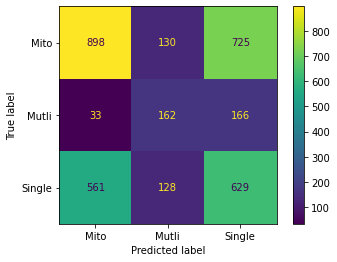

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y1val, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Mito","Mutli","Single"])
cm_display.plot()
plt.show()

In [ ]:
pip install scikit-plot

In [ ]:
from sklearn.metrics import classification_report
pred = pd.DataFrame(pred, columns =[''])
print(classification_report(y1val,pred))

              precision    recall  f1-score   support

           0       0.60      0.51      0.55      1753
           1       0.39      0.45      0.41       361
           2       0.41      0.48      0.44      1318

    accuracy                           0.49      3432
   macro avg       0.47      0.48      0.47      3432
weighted avg       0.51      0.49      0.50      3432



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define the model architecture
model = Sequential()

model.add(Conv1D(filters=96, kernel_size=11, strides=4, activation='relu', input_shape=(25, 1)))
model.add(MaxPooling1D(pool_size=3, strides=2))

model.add(Conv1D(filters=256, kernel_size=5, strides=1, activation='relu', padding="same"))
model.add(MaxPooling1D(pool_size=1, strides=1))

model.add(Conv1D(filters=384, kernel_size=3, strides=1, activation='relu', padding="same"))
model.add(Conv1D(filters=384, kernel_size=3, strides=1, activation='relu', padding="same"))
model.add(Conv1D(filters=256, kernel_size=3, strides=1, activation='relu', padding="same"))
model.add(MaxPooling1D(pool_size=1, strides=1))

model.add(Flatten())

model.add(Dense(units=4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=9, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'],steps_per_execution=75)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 4, 96)             1152      
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 1, 96)            0         
 1D)                                                             
                                                                 
 conv1d_11 (Conv1D)          (None, 1, 256)            123136    
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 1, 256)           0         
 1D)                                                             
                                                                 
 conv1d_12 (Conv1D)          (None, 1, 384)            295296    
                                                                 
 conv1d_13 (Conv1D)          (None, 1, 384)           

In [ ]:
history = model.fit(x=result_kbest_202, y=y_t2, epochs=5
                    , batch_size=25, validation_data=(result_kbest_val, y_val2))

Epoch 1/5
1277/1277 [==============================] - 484s 379ms/step - loss: 2.1982 - accuracy: 0.1098 - val_loss: 2.1992 - val_accuracy: 0.0682
Epoch 2/5
1277/1277 [==============================] - 472s 370ms/step - loss: 2.1976 - accuracy: 0.1082 - val_loss: 2.1990 - val_accuracy: 0.1419
Epoch 3/5
1277/1277 [==============================] - 472s 369ms/step - loss: 2.1975 - accuracy: 0.1097 - val_loss: 2.1968 - val_accuracy: 0.1419
Epoch 4/5
1277/1277 [==============================] - 476s 373ms/step - loss: 2.1975 - accuracy: 0.1125 - val_loss: 2.1958 - val_accuracy: 0.2584
Epoch 5/5
1277/1277 [==============================] - 473s 370ms/step - loss: 2.1975 - accuracy: 0.1070 - val_loss: 2.1994 - val_accuracy: 0.0076


In [ ]:
history = model.fit(x=result_kbest_202, y=y_t2, epochs=10
                    , batch_size=25, validation_data=(result_kbest_val, y_val2))
test_loss, test_acc = model.evaluate(result_kbest_val2,y_val2)
print("Test loss: ", test_loss)
print("Test Accuracy: ",test_acc)

NameError: name 'model' is not defined

In [ ]:
history = model.fit(x=result_kbest_202, y=y_t2, epochs=15
                    , batch_size=25, validation_data=(result_kbest_val, y_val2))
test_loss, test_acc = model.evaluate(result_kbest_val2,y_val2)
print("Test loss: ", test_loss)
print("Test Accuracy: ",test_acc)

In [ ]:
history = model.fit(x=result_kbest_202, y=y_t2, epochs=25
                    , batch_size=25, validation_data=(result_kbest_val, y_val2))
test_loss, test_acc = model.evaluate(result_kbest_val2,y_val2)
print("Test loss: ", test_loss)
print("Test Accuracy: ",test_acc)

In [ ]:
history = model.fit(x=result_kbest_202, y=y_t2, epochs=30
                    , batch_size=25, validation_data=(result_kbest_val, y_val2))
test_loss, test_acc = model.evaluate(result_kbest_val2,y_val2)
print("Test loss: ", test_loss)
print("Test Accuracy: ",test_acc)

In [ ]:
pred=model.predict(result_kbest_val)
pred

In [ ]:
import numpy
actual_pred = []
for ele in pred:
  actual_pred.append(numpy.argmax(ele))
pred = actual_pred

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y1val, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['0',"1","2","3",'4','5','6','7','8'])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
pred = pd.DataFrame(pred, columns =[''])
print(classification_report(y2val,pred))